## Multinomial Classification
* 여러 클래스를 분류하는 방법
    * 이진 분류기를 여러번 쓰는 방법에 비해 행렬 연산을 하는 것이 효과적
* 이진 분류기를 여러번 쓰는 것
    * 클래스 A 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1} \\ w_{a2}\end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2\end{bmatrix}$
    * 클래스 B 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{b1} \\ w_{b2}\end{bmatrix}
    =\begin{bmatrix}w_{b1}x_1 +w_{b2}x_2\end{bmatrix}$
    * 클래스 C 모델:$\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{c1} \\ w_{c2}\end{bmatrix}
    =\begin{bmatrix}w_{c1}x_1 +w_{c2}x_2\end{bmatrix}$
* 하나의 행렬로 계산
    * $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1}  & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} &w_{c2}  \end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2 & w_{b1}x_1 +w_{b2}x_2 & w_{c1}x_1 +w_{c2}x_2 \end{bmatrix}$

### SoftMax Regrerssion
* 다항 로지스틱 휘귀
* Sigmoid 대신 Softmax 함수 사용
    * Softmax : 각 출력 값은 0~1 사이, 모든 클래스의 값의 합은 1
    * sigmoid 보다 좋은 이유 : 하나의 클래스가 높은 값을 갖으면 나머지 클래스는 아주 작은 값, 배타적
* $\displaystyle \hat{P_k} = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{j=0}^ke^{z_k}}$

### Softmax Prediction
* Softmax 결과에서 확률이 가장 높은 클래스 반환
* $\hat{y} = argmax(\hat{p})$

### Cross Entropy
* 소프트 맥스의 비용함수 :
$\displaystyle J(\theta) =  -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^ky_k^{(i)}log(\hat{p_k})$
* 소프트맥스를 통과한 결과값은 어떤 특정한 클래스만 높은 값을 갖고 나머지 클래스는 아주 작은 값을 갖는다.
여기에 y는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있으므로 소프트맥스를 통과한 결과와 y를 곱하는 것만으로도 정답만 값이 나오고 틀린 결과는 0에 가까울 수 밖에 없다. 그런데 소프트맥스를 통과한 값을 $log()$함수를 씌우면 그 반대의 결과가 나온다. 따라서 틀리면 큰값 맞으면 작은 값이 나오므로 비용함수로 적합하다.

### Gradient of Cross Entropy
* $\displaystyle \nabla J(\theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$

* 참고
* 김성훈 교수(https://www.youtube.com/watch?v=MFAnsx1y9ZI&feature=youtu.be)
* 이게 살렸다 : http://saitcelebi.com/tut/output/part2.html
* http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/
* https://deepnotes.io/softmax-crossentropy
* 크로스 엔트로피의 확률통계학적 : https://www.slideshare.net/jaepilko10/ss-91071277
* 크로스 엔트로피 정보학 : https://www.youtube.com/watch?v=ErfnhcEV1O8



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [599]:
X = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]])
print(X[:5], X.shape)

[[-0.1  1.4]
 [-0.5  0.2]
 [ 1.3  0.9]
 [-0.6  0.4]
 [-1.6  0.2]] (20, 2)


In [600]:
y = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_enc = np.eye(3)[y]
print('one-hot encoding:\n', y_enc[:5], y_enc.shape)

one-hot encoding:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] (20, 3)


In [601]:
W = np.random.rand(2,3)
bias = np.random.rand(1,3)

In [609]:
def net_input(X, W):
    return (X.dot(W)) 
net_in = net_input(X, W)
print('net input:\n', X, net_in, net_in.shape)

net input:
 [[-0.1  1.4]
 [-0.5  0.2]
 [ 1.3  0.9]
 [-0.6  0.4]
 [-1.6  0.2]
 [ 0.2  0.2]
 [-0.3 -0.4]
 [ 0.7 -0.8]
 [ 1.1 -1.5]
 [-1.   0.9]
 [-0.5  1.5]
 [-1.3 -0.4]
 [-1.4 -1.2]
 [-0.9 -0.7]
 [ 0.4 -1.3]
 [-0.4  0.6]
 [ 0.3 -0.5]
 [-1.6 -0.7]
 [-0.5 -1.4]
 [-1.  -1.4]] [[ 2.31489921 -1.14010115 -1.01874294]
 [ 0.30480876 -1.28717397  0.204412  ]
 [ 1.56087309  2.42504482 -1.63784473]
 [ 0.63093963 -1.64845187  0.1206326 ]
 [ 0.24617298 -3.83338819  0.99693838]
 [ 0.34212244  0.33314416 -0.29992296]
 [-0.67891436 -0.43481431  0.52779807]
 [-1.28853189  2.13953364  0.11897406]
 [-2.42732465  3.51974328  0.37617805]
 [ 1.43827101 -2.89885764  0.01925587]
 [ 2.45930781 -2.13089917 -0.80846516]
 [-0.73221961 -2.74955451  1.24827659]
 [-2.0633957  -2.46181302  1.94363347]
 [-1.2080896  -1.62895261  1.19382607]
 [-2.13317694  1.76962127  0.72468576]
 [ 0.97306207 -1.31530771 -0.17929036]
 [-0.8126619   1.01893175  0.17342459]
 [-1.24540328 -3.24927075  1.69816103]
 [-2.34688236 -0.24874297

softmax:
 [[0.93698735 0.02959689 0.03341576]
 [0.47438326 0.09654728 0.42906946]
 [0.29292405 0.6951204  0.01195555]
 [0.58731711 0.06010983 0.35257306]
 [0.31892475 0.00539458 0.67568067]
 [0.39725467 0.39370397 0.20904137]
 [0.17796919 0.2271727  0.59485811]
 [0.02785304 0.85834633 0.11380063]
 [0.00249917 0.95625858 0.04124225]
 [0.79679611 0.01041732 0.19278656]
 [0.95397826 0.0096836  0.03633814]
 [0.11934104 0.01587349 0.86478547]
 [0.0176508  0.01185042 0.97049878]
 [0.07873524 0.05168811 0.86957665]
 [0.01471343 0.72891618 0.25637039]
 [0.70555475 0.07156561 0.22287965]
 [0.10076021 0.62912957 0.27011021]
 [0.04970623 0.00670104 0.94359273]
 [0.01860155 0.15162107 0.82977738]
 [0.01442756 0.0379611  0.94761134]] (20, 3)


In [464]:
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax))

predicted class labels:  [0 0 0 0 0 0]


In [613]:
#크로스 엔트로피가 각 클래스별 값을 갖어야 하나 단 하나의 값을 가져야 하나 고민을 했었다.
#크로스 엔트로피는 소프트맥스에 로그를해서 나온 결과를 y와 곱한 결과로 결국 하나의 샘플에 하나의 값만을 가질 수 밖에 없다.
#따라서 클래스별로 값을 갖는 다는 것은 말이 안된다.
#모든 샘플에 대해서 비용을 계산하기 위해 최종적으로 각 샘플별 크로스 엔트로피 결과를 평균내어 단 하나의 값을 가져야 한다.
def cross_entropy(output, y_target):
    s=  np.sum(np.log(output) * (y_target), axis=1)
    return -np.mean(s)
#    return np.mean(- np.sum(np.log(output) * (y_target), axis=0), axis=0)

t_smax = np.array([[0.01, 0.04, 0.9],
                  [0.01, 0.04, 0.9],
                  ])
t_y = np.array([[0,0,1],
               [0,0,1]])
xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: 0.3363244593577739


In [612]:
# https://deepnotes.io/softmax-crossentropy
#위를 따르면 크로스 엔트로피를 미분하면 결국 소프트맥스에서 y를 빼기만 하면 된다.
# 소프트맥스와 y는 모두 클래스별 항목을 가지고 있다. 이 들을 빼면 클래스별로 값이 나온다.
# 각 샘플별 평균을 내서 결국 클래스별 값을 구하는 것인가?
# 중요한것! gradient의 결과는 W의 갯수와 같은 2X3이어야 한다.
# X 항목 2개와 smax-y 3
def gradient(smax, y_target):
    #print(smax)
#    return np.mean(smax-y_target ), axis=0)
    #smax = y_target/smax
    return np.dot(X.T, (smax-y_target) )/y_target.shape[0]
grad = gradient(smax, y_enc)
print('gradient', grad)

gradient [[ 0.02308396 -0.05003885  0.02695489]
 [-0.03759618  0.02280551  0.01479066]]


0 1.105784495515297
50 0.7441327313510782
100 0.5893988573625691
150 0.5072113731650252
200 0.4561931706195983
250 0.4211742508012345
300 0.3954706103861037
350 0.3756961413080815
400 0.3599486273514704
450 0.34707297840945556
499 0.33652213159026134
[0 0 1 0 2 0 2 1 1 0 0 2 2 2 1 0 1 2 2 2]


Text(0.5, 1.0, 'Loss')

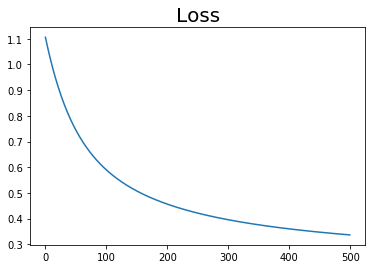

In [604]:
'''
plt.plot(X[y==0,0], X[y==0,1], 'r.')
plt.plot(X[y==1,0], X[y==1,1], 'g.')
plt.plot(X[y==2,0], X[y==2,1], 'b.')
'''
W = np.random.rand(2,3)
#W = np.ones((2,3))
#W = np.array([[-0.5898155,0.10224475,0.48757075],
#              [-0.57289249, 0.11754306, 0.45534943]])

#bias = np.array([0.01, 0.1, 0.1])
bias = np.random.rand(1,3)

#learning_rate = 0.000001
learning_rate = 0.1
epochs = 500
costs = []
for epoch in range(epochs):
    #print('W:', W)
    h = softmax(net_input(X, W))
    #print("smax:", h)
    loss = cross_entropy(h, y_enc)
    costs.append(loss)
    #print('cost:', loss)
    grad = gradient(h, y_enc)
    #print('grad:', grad)
    W = W - learning_rate * grad
    if epoch %50 == 0 or epoch == 0:
        print(epoch, loss)
print(epoch, loss)


mx = softmax(net_input(X, W))
#print(mx)
pred = to_classlabel(mx)
print(pred)
plt.plot(costs)
plt.title("Loss", size=20)

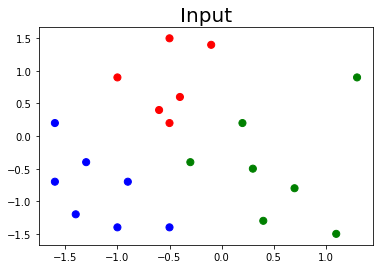

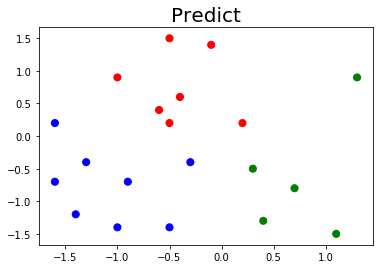

In [605]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
plt.title('Input', size=20)
plt.show()
plt.title('Predict', size=20)
plt.scatter(X[:,0], X[:,1], s=50, c=colormap[pred])
plt.show()

# Softmax Scikit-learn 구현

[[-0.18183797  1.27092437]
 [ 1.49571515 -0.32594365]
 [-1.31387718 -0.94498072]]
[0 0 1 0 2 1 1 1 1 0 0 2 2 2 1 0 1 2 2 2]


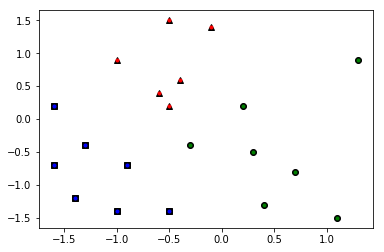

In [614]:
from sklearn.linear_model import LogisticRegression

plt.plot(X[y==0,0], X[y==0,1], 'k^')
plt.plot(X[y==1,0], X[y==1,1], 'ko')
plt.plot(X[y==2,0], X[y==2,1], 'ks')


softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X,y)
print(softmax_reg.coef_)
pred = softmax_reg.predict(X)
print(pred)

plt.plot(X[pred==0,0], X[pred==0,1], 'r.')
plt.plot(X[pred==1,0], X[pred==1,1], 'g.')
plt.plot(X[pred==2,0], X[pred==2,1], 'b.')